# Zero to Hero

## 1.07 Aplicando el arbol

Se aplicará el modelo generado por rpart a los datos nuevos y se genera la salida para Kaggle

In [1]:
rm( list=ls())
gc()

library( "data.table")   #cargo la libreria  data.table
library( "rpart")  #cargo la libreria  rpart
library( "rpart.plot")

options(repr.plot.width=20, repr.plot.height=10) 
setwd("/home/tomas/workspace/uba/dmeyf")  #Aqui se debe poner la ruta de la PC local

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,612244,32.7,1327444,70.9,1121640,60.0
Vcells,1146012,8.8,8388608,64.0,1801044,13.8


In [2]:
dataset <- fread("./datasets/competencia1_2022.csv")   #cargo el dataset #cargo el dataset

In [3]:
dtrain <- dataset[ foto_mes==202101 ]
dapply <- dataset[ foto_mes==202103 ]

In [5]:
head(dtrain)

numero_de_cliente,foto_mes,active_quarter,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,⋯,Visa_fultimo_cierre,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_cconsumos,Visa_cadelantosefectivo,Visa_mpagominimo,clase_ternaria
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,⋯,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>
31115668,202101,1,0,0,56,132,1897.12,24324.75,940.32,⋯,4,0,-16247.77,0.00,3997,18435.59,1,0,1337.22,CONTINUA
31115678,202101,1,0,0,48,100,-384.72,33860.45,-515.53,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,CONTINUA
31117415,202101,1,0,0,60,53,-3622.66,-21310.32,2442.04,⋯,4,0,-33430.50,0.00,1573,12033.40,4,0,20011.38,CONTINUA
31117711,202101,1,0,0,46,273,14542.05,125727.99,1037.77,⋯,4,0,-9832.94,14.27,2063,758.21,3,0,1302.03,CONTINUA
31118145,202101,1,0,0,47,192,1868.27,37305.29,1496.68,⋯,4,0,0.00,0.00,5842,6316.13,1,0,4680.27,CONTINUA
31118204,202101,1,0,0,68,258,2301.86,60781.98,3240.88,⋯,4,0,-46635.34,0.00,3121,37036.92,17,0,4093.77,CONTINUA


In [4]:
#genero el modelo
modelo <-  rpart::rpart(formula= "clase_ternaria ~ ." ,
                        data= dtrain,
                        xval= 0,
                        cp= -1,
                        maxdepth= 2 )

Cargo el dataset a donde voy a aplicar el modelo

Aplico el modelo a los datos dapply  pidiendo que me devuelva probabildades

In [6]:
prediccion  <- predict( modelo, dapply, type = "prob")

Analizo que queda en prediccion

In [7]:
head( prediccion )

,BAJA+1,BAJA+2,CONTINUA
1,0.002109261,0.002455153,0.9954356
2,0.011096962,0.012552301,0.9763507
3,0.002109261,0.002455153,0.9954356
4,0.002109261,0.002455153,0.9954356
5,0.002109261,0.002455153,0.9954356
6,0.002109261,0.002455153,0.9954356


Prediccion es una matriz; me interesa la columna "BAJA+2"  que es la probabilidad que modelo asigna a cada registro de dapply

In [8]:
prob_baja2  <- prediccion[, "BAJA+2"]

In [9]:
head( prob_baja2)

1           2           3           4           5           6 
0.002455153 0.012552301 0.002455153 0.002455153 0.002455153 0.002455153

prob_baja2 es el vector de probabilidades

In [10]:
length( prob_baja2 )
nrow( dapply )

[1] 162900

[1] 162900

Ahora decido si envio el estimulo o no
<br>
si prob( BAJA+2) > 0.025  envio  el estímulo

In [11]:
Predicted   <- ifelse( prob_baja2 > 0.025, 1, 0 )

In [12]:
head( Predicted)

1 2 3 4 5 6 
0 0 0 0 0 0

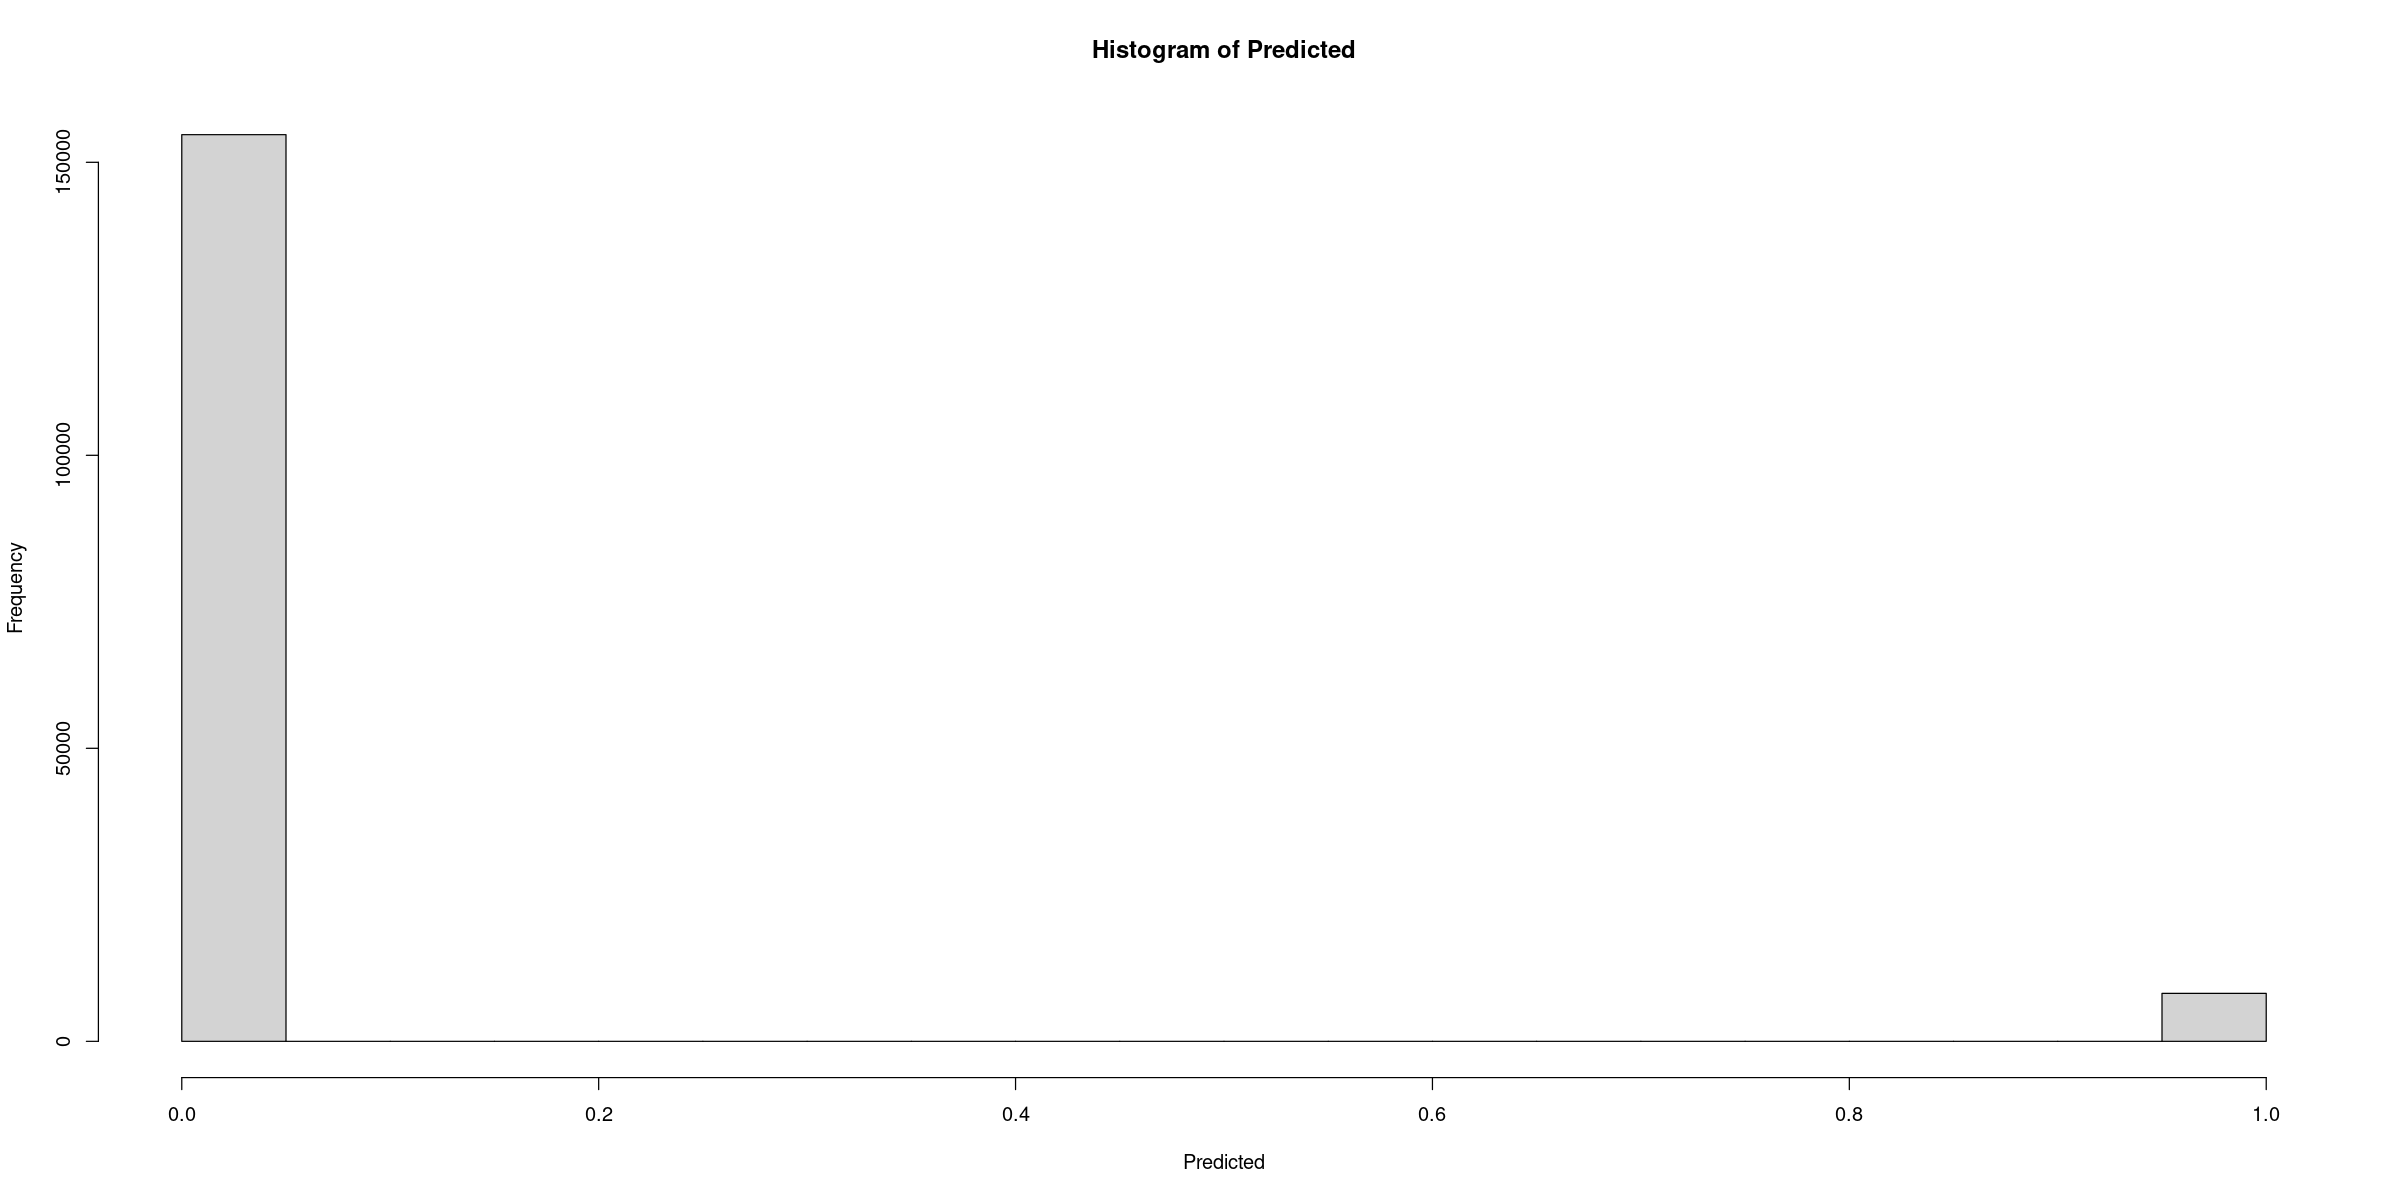

In [13]:
hist( Predicted)

creo una tabla con  lo que voy a enviar a Kaggle

In [14]:
entrega  <-  as.data.table( list( "numero_de_cliente"=dapply$numero_de_cliente, "Predicted"=Predicted)  )

In [15]:
head( entrega)

numero_de_cliente,Predicted
<int>,<dbl>
31115668,0
31115678,0
31117415,0
31117711,0
31118145,0
31118204,0


In [16]:
entrega[ , .N, Predicted]

Predicted,N
<dbl>,<int>
0,154716
1,8184


Esto significa que se enviaran 8184 estímulos

In [17]:
#genero el archivo para Kaggle
#creo la carpeta donde va el experimento
dir.create( "./exp/",  showWarnings = FALSE ) 
dir.create( "./exp/ZH2017/", showWarnings = FALSE )

fwrite( entrega, 
        file= "./exp/ZH2017/para_Kaggle_0107.csv",
        sep=  "," )